In [3]:
#load('ChainedList.py', 'ZFSearchMetagraphNewAlg.py', 'BFS.py','DijkstraMetagraph.py')
#load('all_closures.pyx')
load('DijkstraMetagraphPostClose.pyx', 'ZFSearchMetagraphNewAlgPostClose.pyx')

Compiling ./DijkstraMetagraphPostClose.pyx...
Compiling ./ZFSearchMetagraphNewAlgPostClose.pyx...


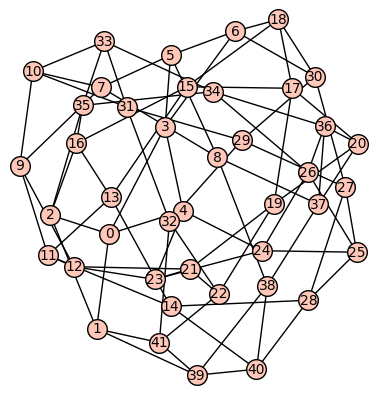

In [9]:
# Initialize a test graph and the associated ZFSearchMetagraph
#H = graphs.CubeGraph(5); H.relabel()
#H = graphs.PetersenGraph()
#H = graphs.CoxeterGraph()       # DNF/DNF/1,284sec/339sec/220sec
#H = graphs.RobertsonGraph()     # DNF
#H = graphs.HeawoodGraph()       # 1.46/~1.20sec/1.03sec/0.22sec/0.16sec/0.12sec
#H = graphs.BrinkmannGraph()     # DNF/DNF/66.5sec/43.3sec/29.81sec/25.97sec
#H = graphs.HoffmanGraph()       # ~19sec/~13.7sec/2.57sec/2.00sec/1.6sec
#H = graphs.ClebschGraph()       # DNF/36.3sec/12.8sec/7.8sec/6.7sec/4.8sec/4.22sec/2.90sec
#H = graphs.DesarguesGraph()     # 14.56sec/8.00sec/5.6sec
#H = graphs.DodecahedralGraph()  # ~25.9sec/~8.9sec/~4.2sec/3.02sec/2.90sec/2.12sec/1.07sec/0.80sec
#H = graphs.HoffmanGraph().complement()
#H = graphs.CompleteGraph(16)
#H = graphs.MycielskiGraph(6)
#H = graphs.RandomTree(22)
#H = graphs.PathGraph(30)
#H = graphs.StarGraph(4)
#H = graphs.HoffmanGraph().line_graph()
H = graphs.CoxeterGraph().line_graph()
#H = graphs.PaleyGraph(13).line_graph()
H.relabel()

#d = {0: [1,2,4], 1: [0,2,5], 2: [0,1,3], 3: [2,4,5], 4: [0,3,5], 5: [1,3,4]}
#H = Graph(d)

if H.num_verts() < 50:
    H.show()

#metaGraph = ZFSearchMetagraphNewAlg(H)
#%time calculate_all_closures(H)

In [10]:
metaGraph = ZFSearchMetagraphNewAlg(H)
#metaGraph = ZFSearchMetagraph(H)
print "\n"
print "This graph has", H.num_verts(), "vertices"
all_unfilled = frozenset([])
all_filled = frozenset(range(H.num_verts()))

%time output = dijkstra(metaGraph, all_unfilled, all_filled)

print " "
print "Zero forcing number:", len(output)
print "Zero forcing set:   ", set(output)
print "Closures calculated:", metaGraph.get_num_closures_calculated()



This graph has 42 vertices
Closures remaining on queue:                 215660
Length of shortest path found in metagraph:  14
CPU times: user 17.4 s, sys: 287 ms, total: 17.7 s
Wall time: 18 s
 
Zero forcing number: 16
Zero forcing set:    set([2, 4, 5, 11, 16, 17, 18, 19, 20, 21, 27, 30, 33, 36, 38, 40])
Closures calculated: 1201631
